In [ ]:
##### Fig. 2 - Workflow of time-resolved representational similarity analysis (RSA)
#
# written by S-C. Baek
# updated date: 16.12.2024
#

In [1]:
# import packages
import os
import pickle

import numpy as np
import pandas as pd

from scipy import stats as stats
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

In [2]:
# path settings
FIGDIR  = os.getcwd()
MAINDIR = os.path.abspath('..')
DATADIR = MAINDIR + os.sep + 'data/'

In [3]:
# subjects
s = os.listdir(DATADIR)
subjects = [i for i in s if 'sub-' in i]
subjects.sort()
n_subjects = len(subjects)

In [4]:
# linguistic elements
elements = ['phoneme', 'prosody']
n_elements = len(elements)

In [ ]:
# Fig. 2b - time-resolved neural RDMs

In [5]:
# data to plot
subi = 0
ei   = 0 # 0: phonemes, 1: prosody

# import the data
fname = DATADIR + subjects[subi] + os.sep + 'meg' + os.sep + 'rdm_rois_' + elements[ei] + '.pickle'
with open(fname, 'rb') as f:
    data = pickle.load(f)
rdms = data['rdms'][1] # L-PAC
n_times, n_dists = rdms.shape

# time information
twindow = 0.024 # in ms
tmin  = data['tmin']
tstep = data['tstep']
tmax = tmin + tstep*(n_times-1)
if np.abs(tmin + 0.2 - twindow/2) > tstep: # check if time windows were applied
    # time window into samples
    twindow_samp = int(twindow/tstep)
    half_twindow_samp = int(twindow_samp/2)
    
    # update time information
    tmin = tmin + half_twindow_samp*tstep
    tmin_samp = half_twindow_samp
    tmax = tmin - half_twindow_samp*tstep
    tmax_samp = n_times - half_twindow_samp
    n_times -= twindow_samp
    
    # apply time windows to rdms
    # Note: calculating cv-Euclidean distance based on windowed data is equivalent to
    #       applying time windows to sample-wise neural RDMs. (i.e., linear calculation)
    rdms_windowed = np.zeros( (n_times, n_dists) )
    tcenter_samp = np.arange(tmin_samp, tmax_samp)
    for t, samp in enumerate(tcenter_samp):
        rdms_windowed[t,:] = np.mean(rdms[samp-half_twindow_samp:samp+half_twindow_samp+1,:], axis=0)
    rdms = rdms_windowed
    del rdms_windowed
tmax = tmin + tstep*(n_times-1)
times = np.linspace(tmin, tmax, n_times)

# rank-tranform the RDMs for visualization
rdms = stats.rankdata(rdms, axis=-1)

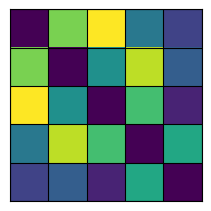

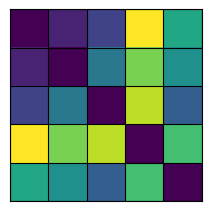

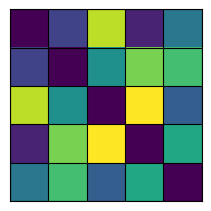

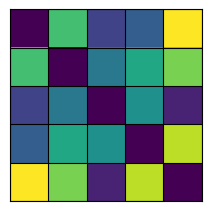

In [6]:
# plotting parameters
tbeg = 0.1
tbeg_idx = np.argmin(np.abs(times-tbeg))

# get the rdms to plot
data = [rdms[tbeg_idx+i*25] for i in range(4)] # 4 rdms every 20 ms

# plotting
ticks = np.linspace(-0.5, 4.5, 6)
for i, d in enumerate(data):
    fig, ax = plt.subplots(figsize=(2,2), constrained_layout=True)
    ax.imshow(squareform(d))
    
    # plot grid lines
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(color='k')

    # make ticks invisible
    for tick in ax.xaxis.get_major_ticks(): # x-axis
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in ax.yaxis.get_major_ticks(): # y-axis
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

In [ ]:
# Fig. 2d - acoustic and categorical RDMs

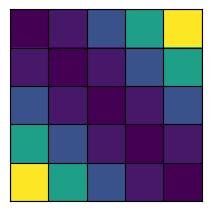

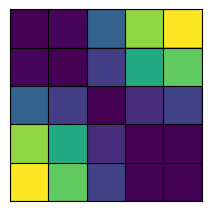

In [7]:
# data to plot
subi = 0
ei   = 0 # 0: phoneme, 1: prosody

# import model RDMs
fname = DATADIR + subjects[subi] + os.sep + 'behavior' + os.sep + 'rdm_models_' + elements[ei] + '.txt'
df = pd.read_csv(fname, sep='\t', index_col=0)

# models to plot
rdm_names = df.columns
rdms = [df[name].values.reshape(5,-1) for name in rdm_names]

# ticks
ticks = np.linspace(-0.5, 4.5, 6)
    
# plotting
for i, d in enumerate(rdms):
        
    # plot model RDMs
    fig, ax = plt.subplots(figsize=(2,2), constrained_layout=True)
    ax.imshow(d)
        
    # plot grid lines
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(color='k')

    # make ticks invisible
    for tick in ax.xaxis.get_major_ticks(): # x-axis
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in ax.yaxis.get_major_ticks(): # y-axis
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)